# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [52]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [53]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mulchen
Processing Record 2 of Set 1 | weno
Processing Record 3 of Set 1 | okha
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | hawaiian paradise park
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | vilyuchinsk
Processing Record 8 of Set 1 | kavaratti
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | uturoa
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | tazacorte
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | minas de marcona
Processing Record 16 of Set 1 | isafjordur
Processing Record 17 of Set 1 | n'zeto
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | tiksi
Pro

In [54]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [55]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mulchen,-37.7167,-72.2333,46.06,90,99,2.04,CL,1682412191
1,weno,7.4515,151.8468,80.55,89,100,3.44,FM,1682412174
2,okha,53.5739,142.9478,31.64,81,40,5.64,RU,1682412192
3,yellowknife,62.4560,-114.3525,34.32,75,20,10.36,CA,1682412040
4,hawaiian paradise park,19.5933,-154.9731,71.11,90,0,0.00,US,1682412194


In [56]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [57]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mulchen,-37.7167,-72.2333,46.06,90,99,2.04,CL,1682412191
1,weno,7.4515,151.8468,80.55,89,100,3.44,FM,1682412174
2,okha,53.5739,142.9478,31.64,81,40,5.64,RU,1682412192
3,yellowknife,62.4560,-114.3525,34.32,75,20,10.36,CA,1682412040
4,hawaiian paradise park,19.5933,-154.9731,71.11,90,0,0.00,US,1682412194


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

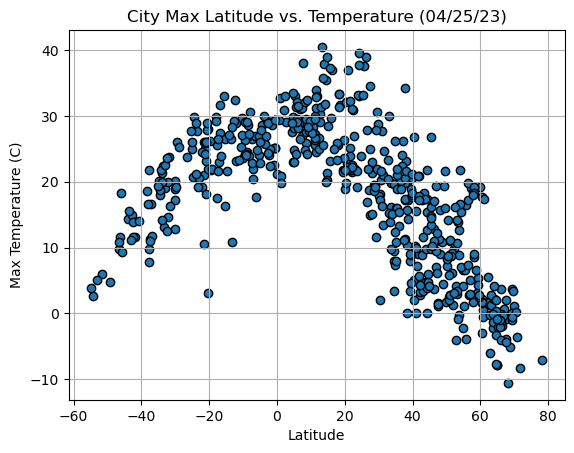

In [60]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], (city_data_df["Max Temp"] - 32) / 1.8, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

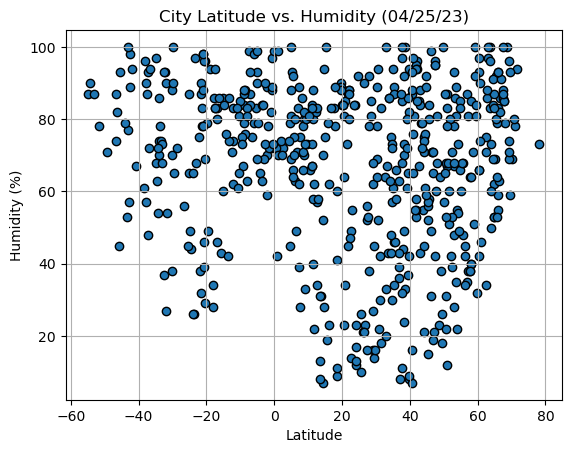

In [61]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

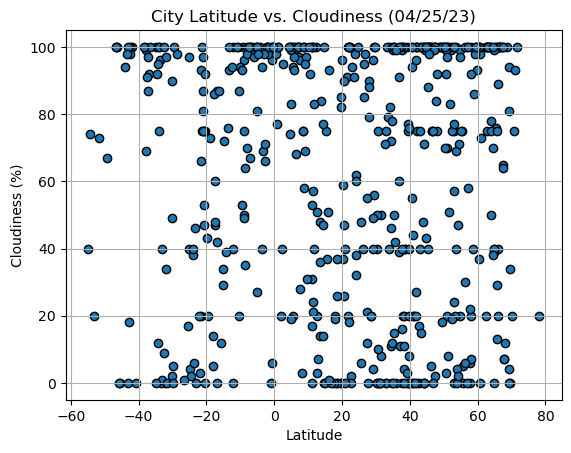

In [62]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

# Set title and labels for axes
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

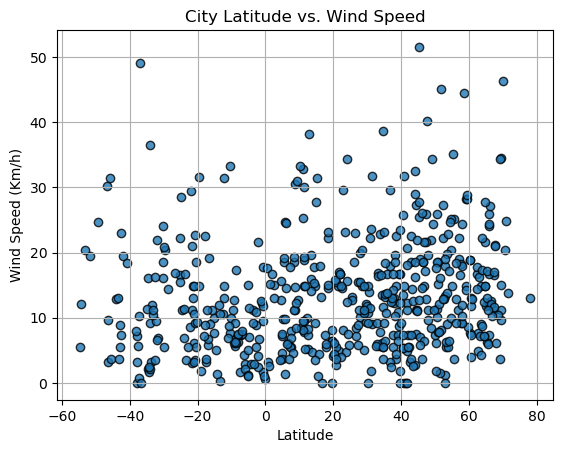

In [64]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"] * 1.60934, edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (Km/h)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [65]:
def create_linreg_plot(x, y, xlabel, ylabel, title):
    # Calculate the linear regression line
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    line = slope * x + intercept
    

In [66]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,weno,7.4515,151.8468,80.55,89,100,3.44,FM,1682412174
2,okha,53.5739,142.9478,31.64,81,40,5.64,RU,1682412192
3,yellowknife,62.4560,-114.3525,34.32,75,20,10.36,CA,1682412040
4,hawaiian paradise park,19.5933,-154.9731,71.11,90,0,0.00,US,1682412194
6,vilyuchinsk,52.9306,158.4028,39.47,78,24,8.28,RU,1682412093


In [67]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mulchen,-37.7167,-72.2333,46.06,90,99,2.04,CL,1682412191
5,port-aux-francais,-49.3500,70.2167,40.55,71,67,15.35,TF,1682412099
8,port elizabeth,-33.9180,25.5701,70.32,74,75,5.75,ZA,1682411953
9,uturoa,-16.7333,-151.4333,81.34,80,87,11.90,PF,1682412197
10,blackmans bay,-43.0167,147.3167,57.74,77,0,5.55,AU,1682412197


###  Temperature vs. Latitude Linear Regression Plot

R-squared: 0.7164


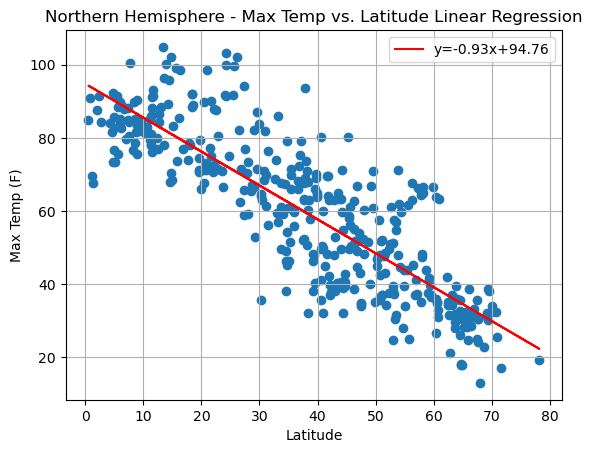

In [68]:
# Linear regression on Northern Hemisphere

slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"R-squared: {r_value**2:.4f}")

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"], intercept + slope*northern_hemi_df["Lat"], "r", label="y={:.2f}x+{:.2f}".format(slope,intercept))
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(True)
plt.legend()

plt.show()

R-squared: 0.5434


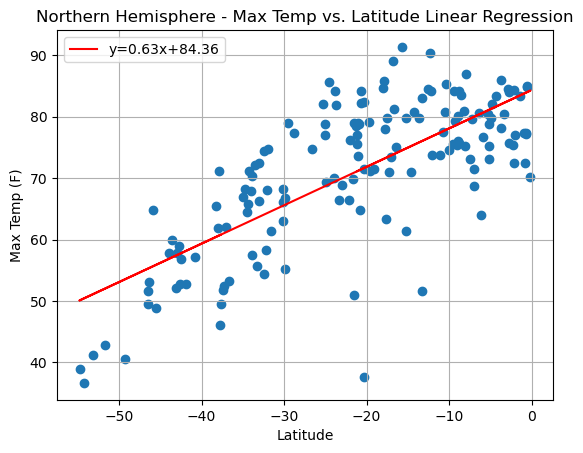

In [70]:
# Linear regression on Northern Hemisphere

slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"R-squared: {r_value**2:.4f}")

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"], intercept + slope*southern_hemi_df["Lat"], "r", label="y={:.2f}x+{:.2f}".format(slope,intercept))
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(True)
plt.legend()

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R-squared: 0.011964209868888792


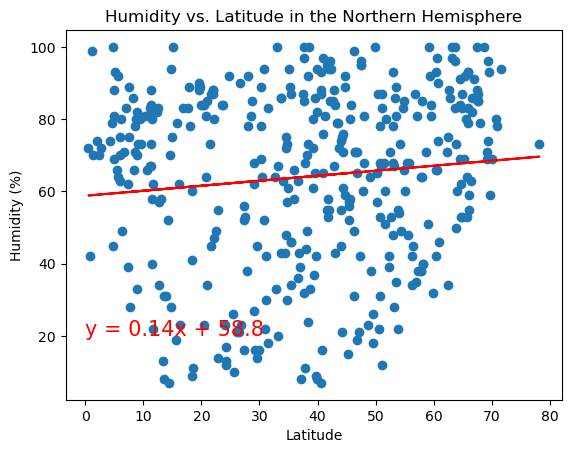

In [71]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. Latitude in the Northern Hemisphere')

print(f"R-squared: {rvalue**2}")
plt.show()


R-squared: 0.004726757148819501


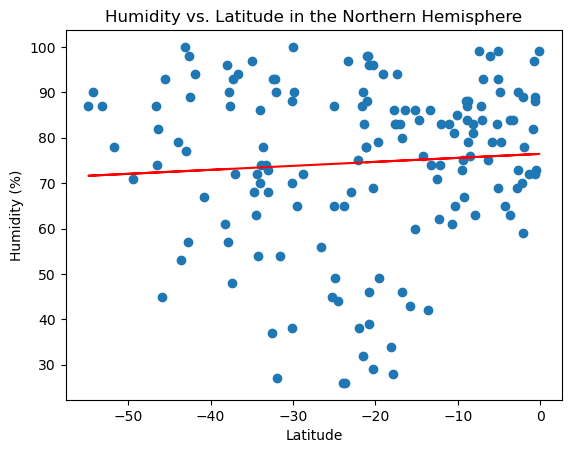

In [72]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. Latitude in the Northern Hemisphere')

print(f"R-squared: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The R-squared is: 0.0012


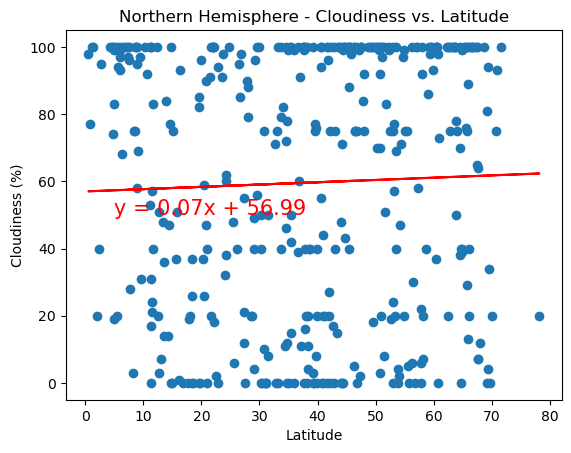

In [73]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o")

plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values = slope * northern_hemi_df["Lat"] + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (5, 50), fontsize=15, color="red")

print(f"The R-squared is: {r_value**2:.4f}")
plt.show()

The R-squared is: 0.0290


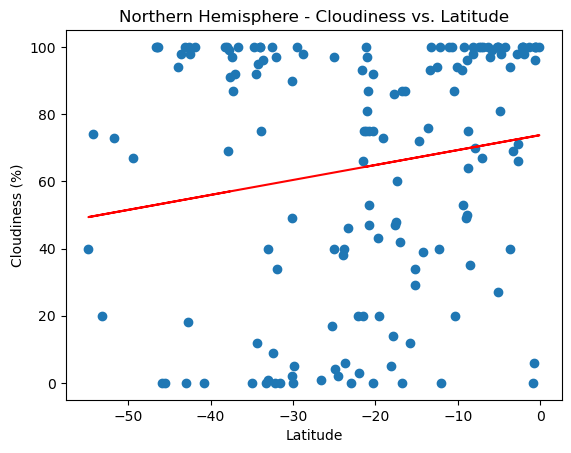

In [74]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o")

plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values = slope * southern_hemi_df["Lat"] + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (5, 50), fontsize=15, color="red")

print(f"The R-squared is: {r_value**2:.4f}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.01940302943633111


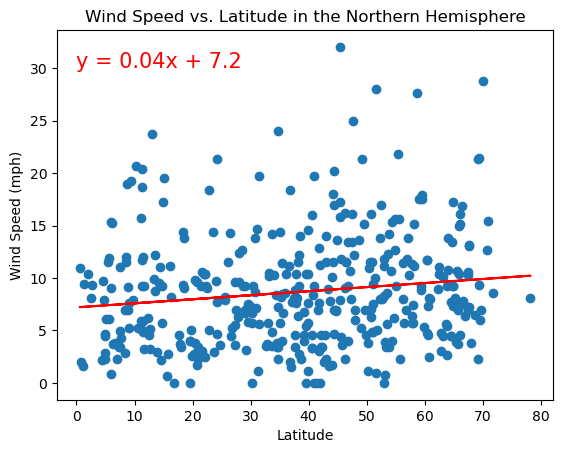

In [75]:
# Northern Hemisphere

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o")
plt.title("Wind Speed vs. Latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.annotate(line_eq, (0, 30), fontsize=15, color="red")
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("output_data/wind_speed_vs_latitude_northern.png")
plt.show()

The r-squared is: 0.050096978580955236


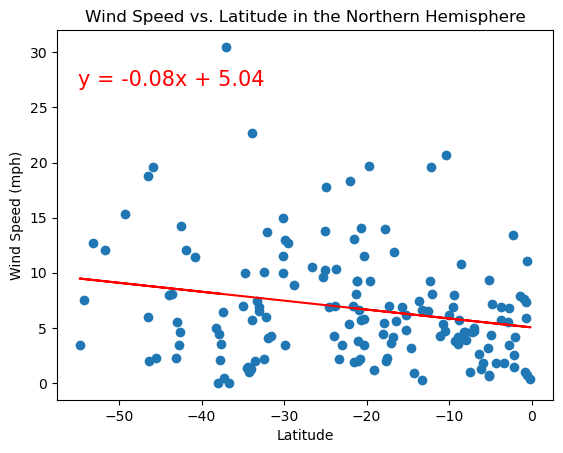

In [76]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o")
plt.title("Wind Speed vs. Latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-55, 27), fontsize=15, color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("output_data/wind_speed_vs_latitude_northern.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE